In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cancer_tumor_data_features.csv")
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)
covariance_matrix = np.cov(x, rowvar=False)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_vectors.shape

(30, 30)

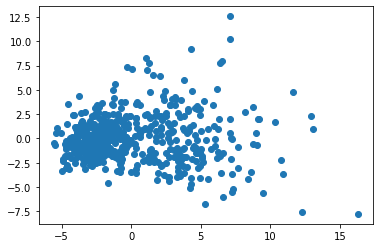

In [7]:
num_comp = 2
sorted_key = np.argsort(eigen_values)[::-1][:num_comp]
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:,sorted_key]
p_components = np.dot(x, eigen_vectors)
plt.scatter(p_components[:,0], p_components[:,1])

# Scikit learn

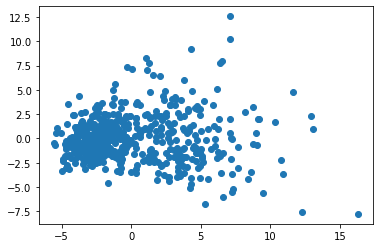

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(x)
plt.scatter(res[:,0], res[:,1])

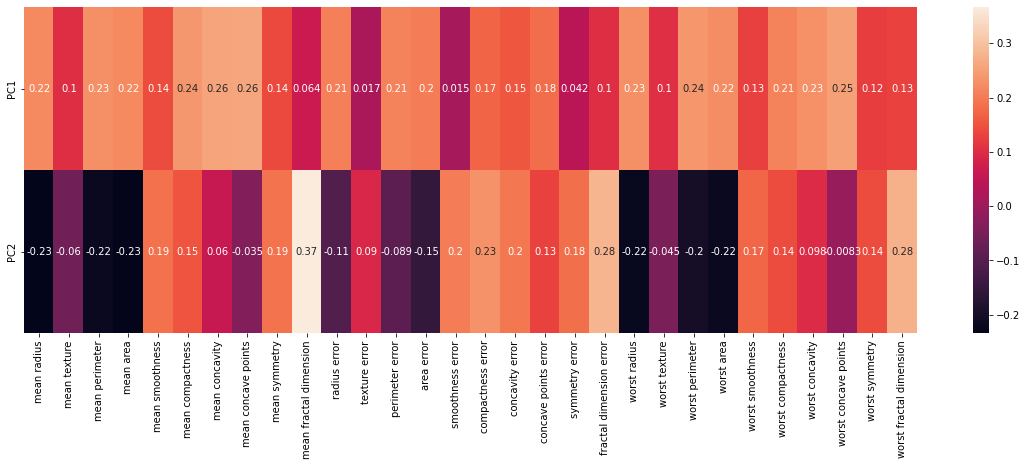

In [7]:
df_comp = pd.DataFrame(pca.components_, index = ["PC1", "PC2"], columns = df.columns)
plt.figure(figsize=(20,6))
sns.heatmap(df_comp,annot=True)

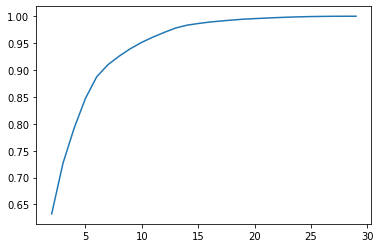

In [10]:
explain_list = []
for k in range(2,30):
  pca_30 = PCA(n_components=k)
  pca_30.fit(x)
  explain_list.append(np.sum(pca_30.explained_variance_ratio_))
plt.plot(range(2,30), explain_list)

(2.0, 10.0)

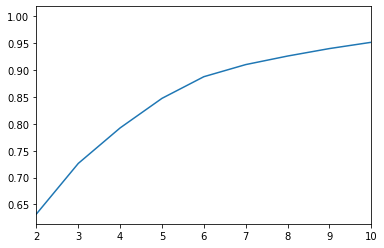

In [11]:
plt.plot(range(2,30), explain_list)
plt.xlim(2,10)

# Model Deployment

In [14]:
df = pd.read_csv("Advertising.csv")
x = df.drop("sales", axis=1)
y = df["sales"]
from sklearn.model_selection import train_test_split
x_train, x_other, y_train, y_other = train_test_split(x,y,test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_other,y_other,test_size=0.5)

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30)
model.fit(x_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error
preds = model.predict(x_val)
print(mean_absolute_error(y_val, preds), np.sqrt(mean_squared_error(y_val, preds)))

0.5118888888888897 0.6641265497434022


In [22]:
test_preds = model.predict(x_test)
print(mean_absolute_error(y_test, test_preds), np.sqrt(mean_squared_error(y_test, test_preds)))

0.6265555555555555 0.7877048234515829


In [24]:
import joblib
joblib.dump(model, "final_model.pkl")
joblib.dump(list(x.columns), "column_names.pkl")

['column_names.pkl']